## Practice: A Flip of a Coin

In this practice assignment, we'll simulate data and calculate probabilities using a few common probability distributions.

### Binomial Distribution Probability Mass Function (PMF)

The binomial probability distribution describes the number of "successes" for some number (n) of independent trials, where each trial has a given probability of success (p). For example, suppose we flip a fair coin 10 times and define "success" as the coin coming up heads. The binomial distribution with parameters n = 10 and p = 0.5 would describe the probability that we observe 0, 1, 2, ..., or 10 heads. Let's actually draw a picture of this distribution.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
print('The libraries are loaded')

Matplotlib is building the font cache; this may take a moment.


The libraries are loaded


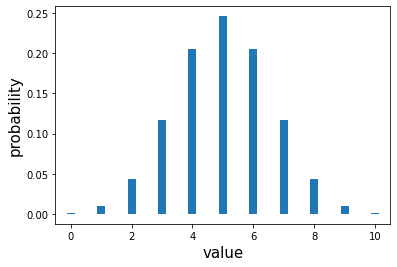

In [2]:
# Set values of n and p
n,p = 10,.5

# Plot the binomial PMF
x = np.arange(0, n+1)
plt.vlines(x, 0, st.binom(n, p).pmf(x), lw=8)
plt.xlabel('value',fontsize=15)
plt.ylabel('probability',fontsize=15)
plt.show()

As expected, we see that the highest probability outcome is 5 heads (with a probability around 0.25). We have a very low probablity of observing 0 or 10 heads.

Sometimes, we may want to simulate data from a distribution. The NumPy `random` module provides functionality to simulate data from a variety of probability distributions, including the binomial distribution. The code below simulates 20 values from a binomial distribution with n = 10 and p = 0.5. If you run this cell a few times, you'll see that you get different results each time. That's because Python is using a random process (just like flipping a real coin!). The probability of each value should nonetheless be equal to the probability printed above.

In [3]:
# Set n, p, and sample size
n,p = 10,.5
s = 20

# Simulate data from a binomial distribution with n=10, p=.5
np.random.binomial(n, p, s)

array([3, 7, 8, 5, 3, 7, 6, 4, 4, 5, 4, 3, 3, 7, 5, 5, 2, 6, 4, 4])

If we plot the frequency of each value in our simulated data, the result should look very similar to the binomial distribution we printed above, especially for a large sample size. The code below simulates 10,000 values from a binomial distribution and then plots the results.

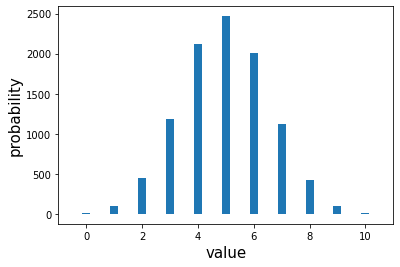

In [4]:
# Save simulated data
s = 10000
sim_data = np.random.binomial(n, p, s)
counts = np.unique(sim_data, return_counts=True)

# Plot PMF for simulated data
plt.vlines(counts[0], 0, counts[1], lw=8)
plt.xlabel('value',fontsize=15)
plt.ylabel('probability',fontsize=15)
plt.xlim(-1,11)
plt.show()

We could also visualize this with a histogram instead of a bar chart as follows.

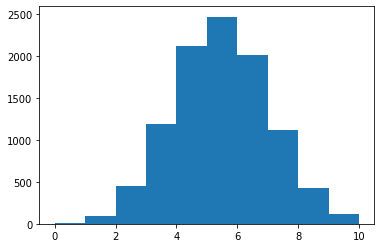

In [5]:
# Could also viz with a histogram
plt.hist(sim_data)
plt.show()

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Simulate 5000 values from a binomial distribution with n = 20 and p = 0.25. Then plot the results using a histogram.**

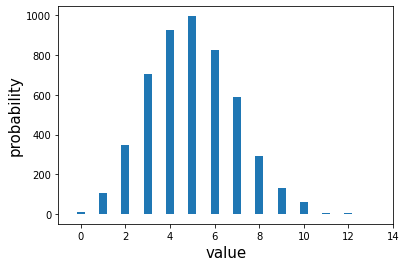

In [18]:
# Simulate the data
###
n_2 = 20
p_2 = 0.25
s_2 = 5000
sim_data_2 = np.random.binomial(n_2, p_2, s_2)

# Plot PMF for simulated data
plt.vlines(counts_2[0], 0, counts_2[1], lw=8)
plt.xlabel('value',fontsize=15)
plt.ylabel('probability',fontsize=15)
plt.xlim(-1,14)
plt.show()
###


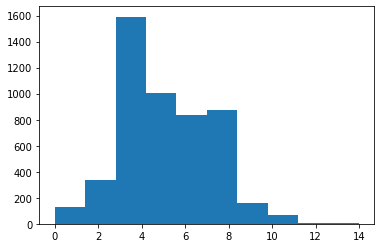

In [15]:
# Create a histogram of the simulated data
###
plt.hist(sim_data_2);
###


<hr style="border:2px solid gray"> </hr>

### Calculate a Probability using a Binomial Distribution
We can use a probability distribution (a PDF/PMF or a CDF) to calculate probabilities. For example, suppose that we challenge a friend to a game: we'll flip a fair coin 10 times. If it comes back heads exactly 5 times, your friend will pay you 5 dollars. Otherwise, you'll pay your friend 1 dollar. What is your probability of winning the game? 

We can use the `binom` function from the `scipy.stats` module to find out! Remember that when we visualized this distribution earlier, we estimated the answer to be around 0.25.

In [24]:
# Probability of getting 5 heads in 10 coin flips
st.binom.pmf(5, n=10, p=.5)

0.24609375000000025

Note that this is similar to calculating the proportion of times you observe exactly 5 heads in a large number of simulated games. Below, we simulate 10,000 games and calculate the proportion of times you would win. The value is similar, but not exactly the same, as we calculated above.

In [25]:
# Probability of 5 heads in 10 coin flips based on simulated data
sim_data = np.random.binomial(n=10, p=.5, size=10000)
np.sum(sim_data == 5)/s

0.2399

Now let's change the game slightly. Suppose you now win if the number of heads is 3 or fewer. Did your chances of winning go up or down? Let's use the binomial CDF to find out!

In [26]:
# Probability of getting 3 or fewer heads in 10 coin flips
st.binom.cdf(3, n=10, p=.5)

0.17187499999999994

We can simulate this as well. What proportion of simulated games did you win?

In [27]:
# Probability of 3 or fewer heads in 10 coin flips based on simulated data
sim_data = np.random.binomial(n=10, p=.5, size=10000)
np.sum(sim_data <= 3)/s

0.1696

Let's change the game one more time. Suppose that you now win if the number of heads is 4, 5, or 6. What is your probability of winning?

To calculate this, we can subtract the binomial CDF of 3 from the binomial CDF of 6. This works because of the following calculation:

CDF(3) = p(heads = 0) + p(heads = 1) + p(heads = 2) + p(heads = 3) 

CDF(6) = p(heads = 0) + p(heads = 1) + p(heads = 2) + p(heads = 3) + p(heads = 4) + p(heads = 5) + p(heads = 6) 

CDF(6) - CDF(3) = p(heads = 4) + p(heads = 5) + p(heads = 6)

In [28]:
# Probability of 4-6 heads in 10 coin flips
st.binom.cdf(6, n=10, p=.5) - st.binom.cdf(3, n=10, p=.5)

0.65625

Same thing, but simulated:

In [29]:
# Probability of 4-6 heads in 10 coin flips based on simulated data
sim_data = np.random.binomial(n=10, p=.5, size=10000)
np.sum((sim_data >=4) & (sim_data <=6))/10000

0.6562

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Calculate the probability of getting 47 - 53 heads in 100 flips of a fair coin using the binomial CDF.**

In [30]:
# Calculate probability of 47-53 heads in 100 flips
###
st.binom.cdf(53,n=100,p = 0.5) - st.binom.cdf(47,n=100,p = 0.5)
###


0.4492910864017284

<hr style="border:2px solid gray"> </hr>

### Percentiles and 95% Intervals using the Binomial Percent Point Function (PPF)

Let's take our game to the next level! Suppose we're now flipping 100 coins and we want to rig the game so that we have a 95% chance of winning. In 100 flips of a fair coin, we expect to get around 50 heads. Can we build an interval around this to ensure that, 95% of the time, we'll get a number of heads in that range?

To do this, we can use the percent point function using `scipy.stats.binom.ppf()`. To understand how this function works, imagine that we played the game infinitely many times (we simulate it 10,000 times below). The ppf gives us percentiles for the resulting values. For example, the 30th percentile is the number of heads such that 30% of games resulted in that number of heads or fewer.

To calculate a 95% interval, we'll use the 2.5th percentile and 97.5th percentile (cutting off 2.5 percent from the low and high ends). This ensures that 95% of values are between these two percentiles.

In [31]:
# If we flip a fair coin 100 times, we can be 95% sure that we'll get between ?? - ?? heads?
sim_data = np.random.binomial(n=100, p=.5, size=10000)
two_pt_fifth_percentile_sim = np.percentile(sim_data, 2.5)
ninety_seven_pt_fifth_percentile_sim = np.percentile(sim_data, 97.5)

print('Between ', round(two_pt_fifth_percentile_sim), ' and ', round(ninety_seven_pt_fifth_percentile_sim), ' heads.')

Between  40  and  60  heads.


In [32]:
# Same thing using the ppf function
two_point_fifth_percentile = st.binom.ppf(.025, n=100, p=.5)
ninety_seven_point_fifth_percentile = st.binom.ppf(.975, n=100, p=.5)

print('Between ', two_point_fifth_percentile, ' and ', ninety_seven_point_fifth_percentile, ' heads.')

Between  40.0  and  60.0  heads.


<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Suppose we only want to be 80% sure that we'll win. Calculate an interval such that number of heads in 100 coin flips will be in that range 80% of the time. Use the percent point function.**

In [33]:
# Calculate 80% CI
###
ten_percentile = st.binom.ppf(0.1,n = 100 , p = 0.5)
ninety_percentile = st.binom.ppf(0.9,n=100,p = 0.5)
print('Between ', ten_percentile, ' and ', ninety_percentile, ' heads.')
###


Between  44.0  and  56.0  heads.


<hr style="border:2px solid gray"> </hr>

### Normal Distribution Probability Density Function (PDF)
So far, we've practiced calculating probabilities using the binomial distribution, which is a discrete probability distribution. Now, let's practice with one of the most commonly used continuous probability distributions: the normal distribution.

The normal distribution has two parameters, the mean (which determines its' center) and standard deviation (which determines it's variation, or width). For example, we've plotted a normal distribution with mean = 5 and standard deviation = 2. 

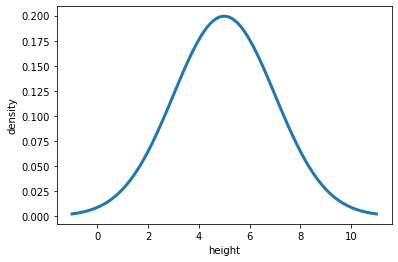

In [34]:
# Plot a normal distribution with mu=5, sigma=2
mean,stdv = 5,2
x = np.linspace(mean - 3*stdv, mean + 3*stdv, 100)
plt.plot(x, st.norm.pdf(x, mean, stdv), lw=3)
plt.xlabel('height')
plt.ylabel('density')
plt.show()

We can also simulate data from a normal distribution as follows. 

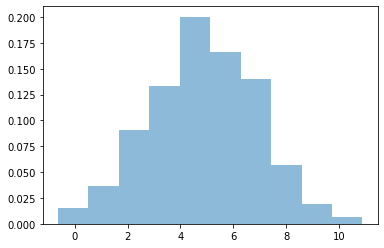

In [35]:
# Simulate data from a normal distribution
mean,stdv = 5,2
s = 1000
sim_data = np.random.normal(mean, stdv, s)

# Plot PDF for simulated data
plt.hist(sim_data, density=True, alpha=.5)
plt.show()

Let's compare the simulated PDF to the true PDF. Notice that they are very similar. The larger the sample size, the closer we expect these distributions to look.

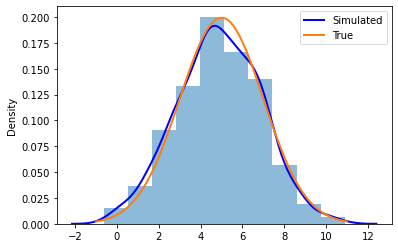

In [36]:
# Plot PDF for simulated data
plt.hist(sim_data, density=True, alpha=.5)

# Plot true PDF
sns.kdeplot(sim_data, lw=2, label='Simulated', color='blue')
x = np.linspace(mean - 3*stdv, mean + 3*stdv, 100)
plt.plot(x, st.norm.pdf(x, mean, stdv), lw=2, label='True')
plt.legend()
plt.show()

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Simulate 1000 data points from a normal distribution with mean = 50 and standard deviation equal to 10. Then, plot a histogram of the simulated data.**

What are the approximate minimum and maximum values that you simulated?

In [43]:
# Simulate 1000 values from a normal distribution with mean = 50 and stdv = 10
###
mean,std = 50,10
sample = 1000
data = np.random.normal(mean,std,sample)
###


(array([0.0008425 , 0.0026679 , 0.00996952, 0.02527485, 0.03271689,
        0.03735061, 0.0221857 , 0.00744204, 0.00168499, 0.00028083]),
 array([15.64926773, 22.77097152, 29.89267531, 37.01437909, 44.13608288,
        51.25778667, 58.37949046, 65.50119425, 72.62289804, 79.74460183,
        86.86630562]),
 <BarContainer object of 10 artists>)

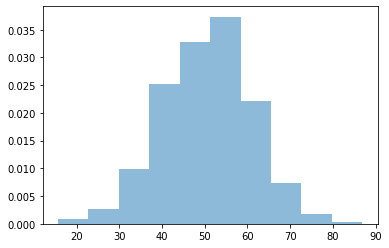

In [44]:
plt.hist(data,density = True , alpha = 0.5)

<hr style="border:2px solid gray"> </hr>

### Calculate a Probability using a Normal Distribution

Suppose that the weight of packages mailed from a distribution center are normally distributed with a mean of 3.2 pounds and a standard deviation of 0.7 pounds. What is the probability that a randomly chosen package will weigh less than 2 pounds?

In [45]:
st.norm.cdf(2, loc = 3.2, scale = 0.7)

0.043238132746832775

What is the probability that a randomly chosen package will weigh more than 4 pounds?

In [46]:
1 - st.norm.cdf(4, loc = 3.2, scale = 0.7)

0.12654895447355785

What is the probability that a randomly chosen package will weigh between 3-4 pounds?

In [47]:
st.norm.cdf(4, loc = 3.2, scale = 0.7) - st.norm.cdf(3, loc = 3.2, scale = 0.7)

0.4859025644284499

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Suppose that the weight of packages mailed from a different distribution center are normally distributed with a mean of 4.5 pounds and a standard deviation of 1.2 pounds. What is the probability that a randomly chosen package will weigh between 4-5 pounds?**

In [49]:
# Calculate probability of a package weighing 4-5 pounds
###
st.norm.cdf(5,loc = 4.5 , scale = 1.2) - st.norm.cdf(4,loc = 4.5 , scale = 1.2)
###


0.3230777609786207

<hr style="border:2px solid gray"> </hr>

## Practice on Your Own

Answer the following prompts to practice working with the binomial and normal distributions.

### Use the following scenario for questions 1-3
Suppose you know that 3% of people who got tested for corona virus at a particular hospital on a single day tested positive. A particular nurse administered 32 tests that day (patients were randomly assigned to him). 

#### 1. What is the probability that he administered exactly one positive test?

Use the binomial PMF to answer this question.

In [61]:
# 1
###
n= 32
p = 0.03
st.binom.pmf(1, n, p)
#st.binom(n, p).pmf(1)



###


0.3734177822273867

#### 2. What is the probability that he administered between 2-5 positive tests?

In [62]:
# 2
###
st.binom.cdf(5,n=32,p = 0.03) - st.binom.cdf(2,n=32,p = 0.03)
###


0.06992788461297217

#### 3. Plot the PMF for the number of positive tests administered by this nurse.

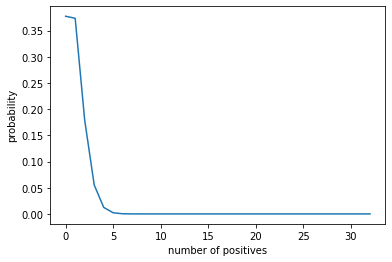

In [69]:
# 3
###
positives = []
for i in range(33):
    positives.append(st.binom.pmf(i,32,0.03))

plt.xlabel('number of positives')
plt.ylabel('probability')
plt.plot(positives)
###


### Use the following scenario for questions 4-6
Suppose that a particular factory produces 12 ounce bottles of orange juice. Based on historical data, you know that the actual amount of juice per bottle is normally distributed with a mean of 12.0 ounces and a standard deviation of .02 ounces. 

#### 4. Calculate the probability that a randomly chosen bottle has less than 11.97 ounces of orange juice.

In [70]:
# 4
###
st.norm.cdf(11.97, loc = 12.0, scale = 0.02)
###


0.06680720126886219

#### 5. Find an interval such that 90% of randomly chosen bottles will have volumes of juice in that range.

In [98]:
# 5
###
fifth_percentile = st.norm.ppf(0.05,12,0.02)
ninety_fifth_percentile = st.norm.ppf(0.95,12,0.02)

print(f"From {fifth_percentile} to {ninety_fifth_percentile} lies 90% of the bottles")
###


From 11.96710292746097 to 12.03289707253903 lies 90% of the bottles


#### 6. Simulate 10 randomly chosen bottles of juice and print the number of ounces in each.

In [71]:
# 6
###
sim_data = np.random.normal(12.0, 0.02, 10)
sim_data
###


array([11.98962528, 11.9888931 , 11.98358462, 12.0230898 , 11.99386688,
       12.00963326, 12.00722029, 12.00297015, 12.00132776, 12.00589466])